In [1]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    # 'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)

In [2]:
c0, c1, c2 = 'red', 'royalblue', 'deepskyblue'

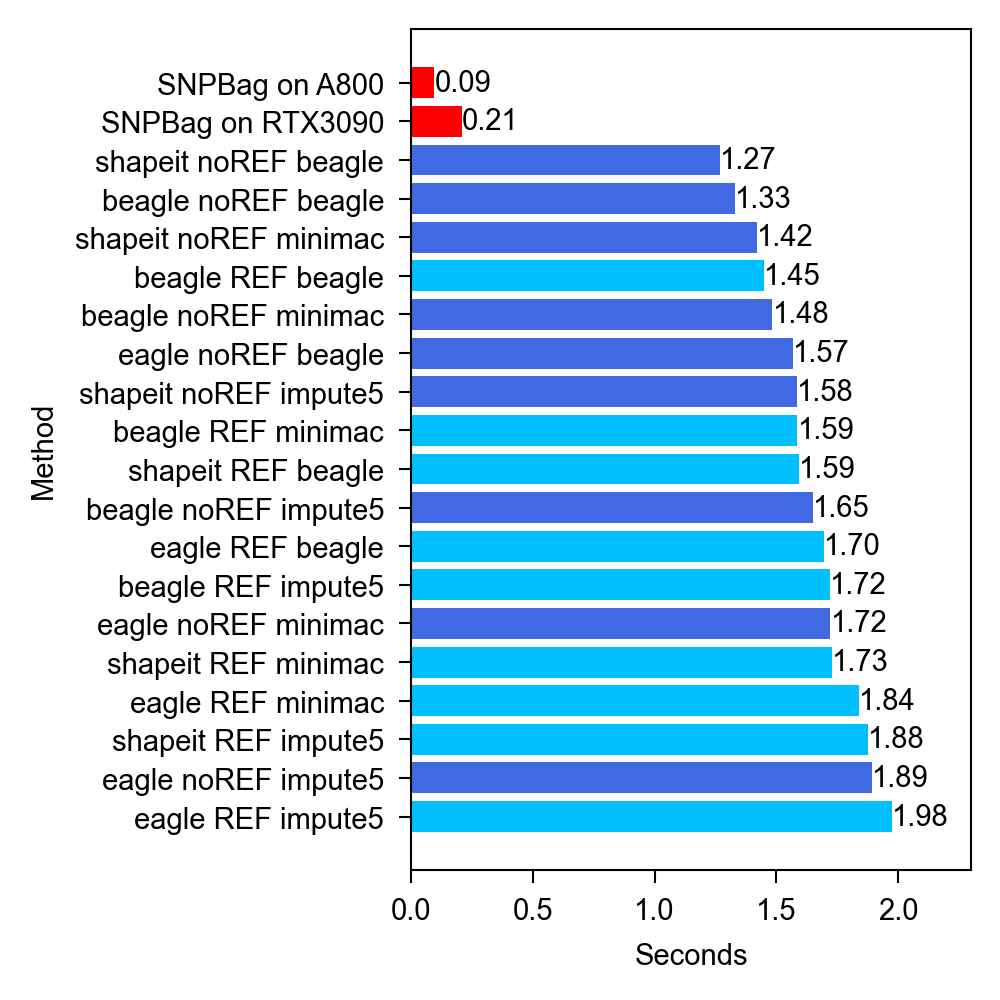

In [3]:

cost = [1.3286111111111112,
1.6490277777777778,
1.4835185185185185,
1.5691203703703704,
1.891898148148148,
1.7218518518518517,
1.267777777777778,
1.5846296296296296,
1.4205092592592594,
1.4485185185185185,
1.7196759259259258,
1.587037037037037,
1.6957407407407405,
1.9753703703703704,
1.840462962962963,
1.5918981481481482,
1.8768518518518518,
1.7281018518518518]
methods = [
'beagle noREF beagle',
'beagle noREF impute5',
'beagle noREF minimac',
'eagle noREF beagle',
'eagle noREF impute5',
'eagle noREF minimac',
'shapeit noREF beagle',
'shapeit noREF impute5',
'shapeit noREF minimac',
'beagle REF beagle',
'beagle REF impute5',
'beagle REF minimac',
'eagle REF beagle',
'eagle REF impute5',
'eagle REF minimac',
'shapeit REF beagle',
'shapeit REF impute5',
'shapeit REF minimac',
]
a800 = 301/3202
rtx3090 = 664/3202
cost = [a800, rtx3090, *cost]
methods = ['SNPBag on A800', 'SNPBag on RTX3090', *methods]

colors = [c0, c0, c1, c1, c1, c1, c1, c1, c1, c1, c1, c2, c2, c2, c2, c2, c2,c2, c2, c2]

# sort
colors, methods, cost = zip(*sorted(zip(colors, methods, cost), key=lambda x: x[2], reverse=True))


# barplot

import matplotlib.pyplot as plt
plt.figure(figsize=figsize, dpi=300)

plt.barh(methods, cost, color=colors)
# text
for i, (metric, method) in enumerate(zip(cost, methods)):
    plt.text(metric + 0.001, i, f"{metric:.2f}", va='center', fontsize=fontsize)
plt.xlim(0, 2.3)
plt.yticks(rotation=0)
plt.xlabel('Seconds', fontsize=fontsize)
plt.ylabel('Method', fontsize=fontsize)
# plt.title('Imputation Cost', fontsize=base_font_size + 2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.savefig('imputation_speed.pdf')
plt.show()